# Data Cleaning 

In [1]:
# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline

from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split,GridSearchCV  # to split the data into two parts
from sklearn.model_selection import KFold, cross_val_score  # use for K- fold cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score,average_precision_score, precision_score, confusion_matrix, classification_report

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,confusion_matrix, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  #
import seaborn as sns  #
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Loading the Train and Test Sets

train = pd.read_csv('4910797b-ee55-40a7-8668-10efd5c1b960.csv')
test  = pd.read_csv('702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv')
label  = pd.read_csv('0bf8bc6e-30d0-4c50-956a-603fc693d966.csv')
full_data = [train, test, label]
print (train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [6]:
label.head(3)

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional


In [7]:
print('This dataset contains ',train.shape[0],'rows')
print('This dataset contains ',train.shape[1],'columns')

('This dataset contains ', 59400, 'rows')
('This dataset contains ', 40, 'columns')


In [8]:
df = train.merge(label, on="id")
df.sample(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
38706,8660,0.0,2011-04-11,World Bank,0,world,36.680731,-6.414765,Shuleni,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe multiple,communal standpipe,non functional
37448,69132,0.0,2011-07-30,Oxfam,0,OXFAM,30.500588,-2.515956,Samson,0,...,soft,good,enough,enough,spring,spring,groundwater,other,other,functional
6129,42474,200.0,2013-01-17,Isf/tacare,1057,ISF/TACARE,29.673062,-4.711537,City,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe multiple,communal standpipe,non functional
22276,58702,10.0,2013-03-20,Private Individual,1610,Dmdd,35.861964,-3.259196,Kwa Andre Binas,0,...,soft,good,seasonal,seasonal,river,river/lake,surface,communal standpipe,communal standpipe,functional
12452,14584,0.0,2013-02-04,Tassaf,1345,TASSAF,30.607554,-3.940385,Christopher,0,...,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe,non functional


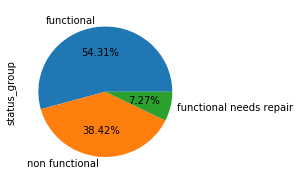

In [24]:
# Quick Visualization of The Target Variable

plt.figure(figsize=(3,3))
pd.Series(df['status_group']).value_counts().plot(kind ='pie', autopct='%1.2f%%')

### Data Preprocessing / Transformation

Data Cleaning
To-do:

[x] Convert "date_recorded" into datetime object.

[x] Convert target label 'status_group' into categorical dtype.

[x] Convert 0 into np.nan in construction_year

[x] Merge all English and Swahili terms in wpt_name into English.

[ ] Convert all objects into categorical dtypes before OHE.

[ ] Consider converting "0" into most popular category for "funder" and "installer"

[ ] Compare model performance when removing "M", "1" and "I" in "subvillage" vs. keeping them.

[ ] Compare model performance when removing "K", "M", "I", "N" and "S" in "scheme_name" vs. keeping them.

[ ] Values greater than 10,000 in "population" appear to be outliers and needs cleaning.

[ ] Convert "none" in "wpt_name" into most popular category.

[ ] Clean the 0.0 in "longitude" values as they appear to be clerical errors.


In [9]:
 ## Convert date_recorded into a datetime object for further engineering
df['date_recorded'] = pd.to_datetime(df['date_recorded'], infer_datetime_format=True, errors='ignore')

In [10]:
# Convert target feature into categorical to speed up training of the ML models
df['status_group'] = df['status_group'].astype('category')

## Feature Engineering

In [11]:
# Creating new features from the date_recorded feature representing the date the row was entered into the dataset.
df['year_recorded'] = df['date_recorded'].dt.year
df['month_recorded'] = df['date_recorded'].dt.month 
df['week_of_year_recorded'] = df['date_recorded'].dt.weekofyear
df['day_of_week_recorded'] = df['date_recorded'].dt.dayofweek
df['day_of_year_recorded'] = df['date_recorded'].dt.dayofyear
df['quarter_of_date_recorded'] = df['date_recorded'].dt.quarter


# Transform "construction_year" dtype into int to do operations so we can calculate the years difference 
# from when a waterpoint was constructed and when it was last checked.
df['construction_year'] = df['construction_year'].astype("int64")
df['age_of_pump'] = df['year_recorded'].values - df['construction_year'].values

# Sanity checking the new features compared to date_recorded
df[['date_recorded',
    'construction_year',
    'year_recorded',  
    'age_of_pump',
    'month_recorded',
    'week_of_year_recorded',
    'day_of_week_recorded',
    'day_of_year_recorded',
    'quarter_of_date_recorded'
   ]].head(5)

,date_recorded,construction_year,year_recorded,age_of_pump,month_recorded,week_of_year_recorded,day_of_week_recorded,day_of_year_recorded,quarter_of_date_recorded
0,2011-03-14,1999,2011,12,3,11,0,73,1
1,2013-03-06,2010,2013,3,3,10,2,65,1
2,2013-02-25,2009,2013,4,2,9,0,56,1
3,2013-01-28,1986,2013,27,1,5,0,28,1
4,2011-07-13,0,2011,2011,7,28,2,194,3


In [12]:
df[['date_recorded',
    'year_recorded', 
    'construction_year', 
    'age_of_pump',
    'month_recorded', 
    'week_of_year_recorded',
    'day_of_week_recorded',
    'day_of_year_recorded',
    'quarter_of_date_recorded'
   ]].dtypes

date_recorded               datetime64[ns]
year_recorded                        int64
construction_year                    int64
age_of_pump                          int64
month_recorded                       int64
week_of_year_recorded                int64
day_of_week_recorded                 int64
day_of_year_recorded                 int64
quarter_of_date_recorded             int64
dtype: object

All the new features created off of date_recorded pass the sanity checks and all share the int64 data type. This is important as they are now numerical values required for most machine learning models.

In [13]:
# Dropping date_recorded as we have engineered new features based on it.
df.drop('date_recorded',axis=1, inplace=True, errors='ignore')
df.head(3)

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,waterpoint_type,waterpoint_type_group,status_group,year_recorded,month_recorded,week_of_year_recorded,day_of_week_recorded,day_of_year_recorded,quarter_of_date_recorded,age_of_pump
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,communal standpipe,communal standpipe,functional,2011,3,11,0,73,1,12
1,8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,communal standpipe,communal standpipe,functional,2013,3,10,2,65,1,3
2,34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,communal standpipe multiple,communal standpipe,functional,2013,2,9,0,56,1,4


We can create an additional feature by doing the following calculation ('amount_tsh' / 'population') which will return the proportion of water available to a waterpoint out of the full population nearby.

In [23]:
df['water_relative_to_pop'] = df['amount_tsh'].values - df['population'].values
print("water relative to population values range: ", df['water_relative_to_pop'].value_counts())

water relative to population values range:   0.0         20713
-1.0          4915
-200.0        1388
-150.0        1276
-250.0        1132
-300.0         985
-100.0         906
-500.0         763
-350.0         762
-50.0          754
-120.0         647
-400.0         624
-60.0          435
-30.0          403
-80.0          363
 49.0          359
-130.0         345
-450.0         340
-600.0         320
-20.0          319
-40.0          315
-230.0         301
 19.0          267
 350.0         260
-70.0          255
 200.0         253
 1000.0        246
-180.0         240
 999.0         216
 250.0         202
             ...  
-11.0            1
 9700.0          1
 39850.0         1
 4289.0          1
-1394.0          1
-2518.0          1
 2895.0          1
 6338.0          1
 294.0           1
 4966.0          1
 1878.0          1
 868.0           1
-2890.0          1
 1755.0          1
 13690.0         1
 4860.0          1
 169850.0        1
-6800.0          1
 438.0           1
 322.0

Although there are disproportionately more negative values in the amount of water available out of population nearby this is the reality in Tanzania. Water availability is scarce in Tanzania, in fact according to water.org only 50% of Tanzania's population of 53 million have access to an improved source of safe water. This is the reason why Tanzanians spend a significant amount of time travelling some distance to collect water.

In [24]:
df.dtypes

id                             int64
amount_tsh                   float64
funder                        object
gps_height                     int64
installer                     object
longitude                    float64
latitude                     float64
wpt_name                      object
num_private                    int64
basin                         object
subvillage                    object
region                        object
region_code                    int64
district_code                  int64
lga                           object
ward                          object
population                     int64
public_meeting                object
recorded_by                   object
scheme_management             object
scheme_name                   object
permit                        object
construction_year              int64
extraction_type               object
extraction_type_group         object
extraction_type_class         object
management                    object
m

### Merging the TRain and Test Sets

In [ ]:
#merge train and target:
#train = train.merge(train_target)

train['train_test'] = 'train'
test['train_test'] = 'test'

combined = pd.concat([train, test])

In [25]:

# Identify all categorical features
df_objects = df.select_dtypes(include=['object'])
df_objects.columns

Index(['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region',
       'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

### Encoding Categorical Variables

In [ ]:
#Use one-hot encoding for low ordinality features:
import category_encoders as ce
one_hot_cols = ['source_class', 'permit', 'management_group', 'quantity', 'payment', 'public_meeting',
                'waterpoint_type', 'basin', 'source', 'water_quality', 'management',
                'extraction_type_group', 'region_code']

one_hot_ce = ce.OneHotEncoder(cols=one_hot_cols, verbose=10, use_cat_names=True)

train = one_hot_ce.fit_transform(train)

#Use binary encoder for high ordinality features:

binary_cols = ['funder', 'installer', 'subvillage', 'ward', 'scheme_name', 'lga','payment_type','quality_group','wpt_name']
              
binary_ce = ce.BinaryEncoder(cols=binary_cols, return_df=True)

df= binary_ce.fit_transform(train)

In [41]:
#Use one-hot encoding for low ordinality features:
import category_encoders as ce
one_hot_cols = ['installer', 'wpt_name', 'management_group', 'quantity', 'payment', 'public_meeting',
                'waterpoint_type', 'basin', 'source', 'water_quality', 'management',
                'extraction_type_group', 'region_code']

one_hot_ce = ce.OneHotEncoder(cols=one_hot_cols, verbose=10, use_cat_names=True)

### Scaling the Latitude and Longitude 

In [14]:
#scale the latitude and longitude
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[['longitude', 'latitude']])
df[["longitude","latitude"]] = scaler.transform(df[["longitude","latitude"]])

### Haversine Distance Between the Two Lat/Lons:

In [15]:
def haversine_array(lat1, lng1, lat2, lng2): 
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2)) 
    AVG_EARTH_RADIUS = 6371 # in km 
    lat = lat2 - lat1 
    lng = lng2 - lng1 
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) *      np.sin(lng * 0.5) ** 2 
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d)) 
    return h

In [16]:
df['haversine_distance'] = df.apply(lambda x: haversine_array(x['longitude'], x['longitude'], x['latitude'], x['latitude']),axis=1)

### Log Transformation

In [17]:
df['amount_tsh_tf'] = df['amount_tsh'].apply(lambda x: np.log(1+x))

In [72]:
df['age_of_pump_tf'] = df['age_of_pump'].apply(lambda x: np.log(1+x))

In [18]:
df['gps_height_tf'] = df['gps_height'].apply(lambda x: np.log(1+x))

### Drop the Irrelevant Features

In [19]:

drop_cols = ['id','amount_tsh','gps_height']

df = df.drop(columns = drop_cols)

In [21]:
df.head(3)

,funder,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,...,year_recorded,month_recorded,week_of_year_recorded,day_of_week_recorded,day_of_year_recorded,quarter_of_date_recorded,age_of_pump,haversine_distance,amount_tsh_tf,gps_height_tf
0,Roman,Roman,0.131052,-1.408791,none,0,Lake Nyasa,Mnyusi B,Iringa,11,...,2011,3,11,0,73,1,12,242.134232,8.699681,7.237778
1,Grumeti,GRUMETI,0.094610,1.207934,Zahanati,0,Lake Victoria,Nyamara,Mara,20,...,2013,3,10,2,65,1,3,175.066941,0.000000,7.244228
2,Lottery Club,World vision,0.515158,0.639751,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,...,2013,2,9,0,56,1,4,19.592213,3.258097,6.532334


In [71]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

L_en = LabelEncoder()
O_en = OneHotEncoder(sparse=False)

one_hot_categories = ['subvillage','basin','wpt_name','region','job_type', 'cellphone_access', 'relationship_with_head', 'marital_status'] #attributes to convert to 1hot

for category in one_hot_categories: #iterate over attributes
    out1 = L_en.fit_transform(train[[category]].values.ravel())    
    out2 = O_en.fit_transform(out1.reshape(-1,1)).astype('int')

    for i, name in enumerate(L_en.classes_):
            train[name] = out2[:,i] # make new column filled with 0s, 1s

train.drop(one_hot_categories , axis=1, inplace=True) #drop original colsdf

,funder,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,...,month_recorded,week_of_year_recorded,day_of_week_recorded,day_of_year_recorded,quarter_of_date_recorded,age_of_pump,haversine_distance,manhattan_distance,amount_tsh_tf,gps_height_tf
0,Roman,Roman,0.131052,-1.408791,none,0,Lake Nyasa,Mnyusi B,Iringa,11,...,3,11,0,73,1,12,242.134232,0.0,8.699681,7.237778
1,Grumeti,GRUMETI,0.094610,1.207934,Zahanati,0,Lake Victoria,Nyamara,Mara,20,...,3,10,2,65,1,3,175.066941,0.0,0.000000,7.244228
2,Lottery Club,World vision,0.515158,0.639751,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,...,2,9,0,56,1,4,19.592213,0.0,3.258097,6.532334


## Treating the Missing Values 

,Total,Percent
scheme_name,28166,0.474175
scheme_management,3877,0.065269
installer,3655,0.061532
funder,3635,0.061195
public_meeting,3334,0.056128


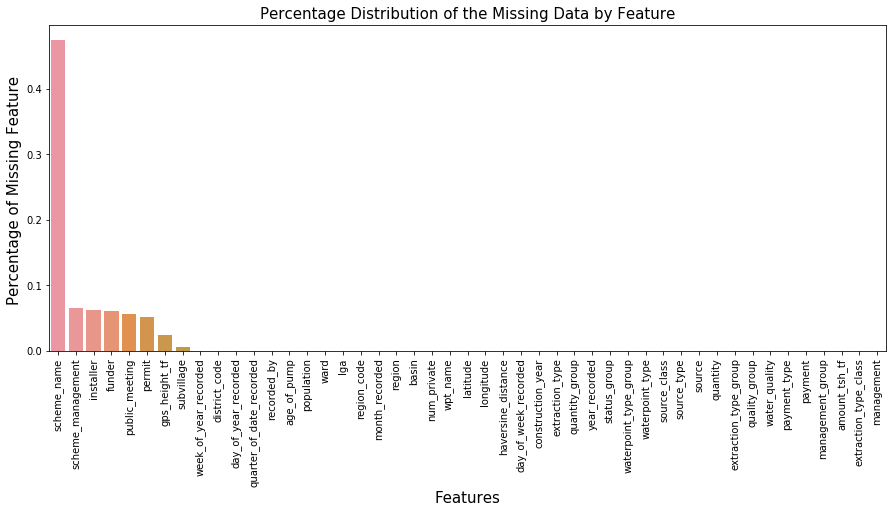

In [25]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percentage of Missing Feature ', fontsize=15)
plt.title('Percentage Distribution of the Missing Data by Feature', fontsize=15)
missing_data.head()

In [27]:
df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [28]:
df['scheme_management'].mode()
df['scheme_management'] = df['scheme_management'].fillna('VWC')

0    VWC
dtype: object

In [31]:

df['gps_height_tf'].fillna(df['gps_height_tf'].median(),inplace=True)

In [33]:
df['scheme_name'].mode()
df['scheme_name'] = df['scheme_name'].fillna('K')

0    K
dtype: object

In [39]:
df['installer'].mode()
df['installer'] = df['installer'].fillna('DWE')

In [41]:
df['funder'].mode()
df['funder'] = df['funder'].fillna(' Government Of Tanzania')

In [45]:
df['public_meeting'].mode()
df['public_meeting'] = df['public_meeting'].fillna('True')

In [47]:
df['permit'].mode()
df['permit'] = df['permit'].fillna('True')

In [49]:
df['subvillage'].mode()
df['subvillage'] = df['subvillage'].fillna('Madukani')

In [63]:
# Checking for any Missing Values after Imputation

missing_df =df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Column Name', 'Missing Values Count']
missing_df['Filling Factor (%)']=(df.shape[0]-missing_df['Missing Values Count'])/df.shape[0]*100
missing_df.sort_values('Filling Factor (%)').reset_index(drop = True)

,Column Name,Missing Values Count,Filling Factor (%)
0,funder,0,100.0
1,quality_group,0,100.0
2,quantity,0,100.0
3,quantity_group,0,100.0
4,source,0,100.0
5,source_type,0,100.0
6,source_class,0,100.0
7,waterpoint_type,0,100.0
8,waterpoint_type_group,0,100.0
9,status_group,0,100.0


In [62]:
from sklearn.preprocessing import LabelEncoder
# create a labelencoder object
le = LabelEncoder()
# fit and transform on the data
df['region_le'] = le.fit_transform(df['region'])
df.head(3)

,funder,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,...,age_of_pump,haversine_distance,amount_tsh_tf,gps_height_tf,funder_le,installer_le,wpt_name_le,basin_le,subvillage_le,region_le
0,Roman,Roman,0.131052,-1.408791,none,0,Lake Nyasa,Mnyusi B,Iringa,11,...,12,242.134232,8.699681,7.237778,1370,2245,37399,1,11807,3
1,Grumeti,K,0.094610,1.207934,Zahanati,0,Lake Victoria,Nyamara,Mara,20,...,3,175.066941,0.000000,7.244228,470,598,37195,4,15838,9
2,Lottery Club,Nyumba ya mungu pipe scheme,0.515158,0.639751,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,...,4,19.592213,3.258097,6.532334,826,2121,14572,5,9074,8


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 33 columns):
longitude                   59400 non-null float64
latitude                    59400 non-null float64
num_private                 59400 non-null int64
region_code                 59400 non-null int64
district_code               59400 non-null int64
population                  59400 non-null int64
public_meeting              59400 non-null object
permit                      59400 non-null object
construction_year           59400 non-null int64
payment                     59400 non-null object
water_quality               59400 non-null object
quantity                    59400 non-null object
source                      59400 non-null object
source_class                59400 non-null object
status_group                59400 non-null category
year_recorded               59400 non-null int64
month_recorded              59400 non-null int64
week_of_year_recorded       59400 non-null i

In [97]:
from sklearn.preprocessing import LabelEncoder
# create a labelencoder object
le = LabelEncoder()
# fit and transform on the data
df['payment_le'] = le.fit_transform(df['payment'])
df.head(3)

,longitude,latitude,num_private,region_code,district_code,population,public_meeting,permit,construction_year,payment,...,gps_height_tf,funder_le,installer_le,wpt_name_le,basin_le,subvillage_le,region_le,age_of_pump_tf,water_quality_le,payment_le
0,0.131052,-1.408791,0,11,5,109,True,False,1999,pay annually,...,7.237778,1370,2245,37399,1,11807,3,2.564949,6,2
1,0.094610,1.207934,0,20,2,280,True,True,2010,never pay,...,7.244228,470,598,37195,4,15838,9,1.386294,6,0
2,0.515158,0.639751,0,21,4,250,True,True,2009,pay per bucket,...,6.532334,826,2121,14572,5,9074,8,1.609438,6,4


In [104]:
from sklearn.preprocessing import LabelEncoder
# create a labelencoder object
le = LabelEncoder()
# fit and transform on the data
df['quantity_le'] = le.fit_transform(df['quantity'])
df.head(3)

,longitude,latitude,num_private,region_code,district_code,population,public_meeting,permit,construction_year,quantity,...,funder_le,installer_le,wpt_name_le,basin_le,subvillage_le,region_le,age_of_pump_tf,water_quality_le,payment_le,quantity_le
0,0.131052,-1.408791,0,11,5,109,True,False,1999,enough,...,1370,2245,37399,1,11807,3,2.564949,6,2,1
1,0.094610,1.207934,0,20,2,280,True,True,2010,insufficient,...,470,598,37195,4,15838,9,1.386294,6,0,2
2,0.515158,0.639751,0,21,4,250,True,True,2009,enough,...,826,2121,14572,5,9074,8,1.609438,6,4,1


In [107]:
from sklearn.preprocessing import LabelEncoder
# create a labelencoder object
le = LabelEncoder()
# fit and transform on the data
df['permit_le'] = le.fit_transform(df['permit'])
df.head(3)

,longitude,latitude,num_private,region_code,district_code,population,public_meeting,permit,construction_year,quantity,...,wpt_name_le,basin_le,subvillage_le,region_le,age_of_pump_tf,water_quality_le,payment_le,quantity_le,public_meeting_le,permit_le
0,0.131052,-1.408791,0,11,5,109,True,False,1999,enough,...,37399,1,11807,3,2.564949,6,2,1,1,0
1,0.094610,1.207934,0,20,2,280,True,True,2010,insufficient,...,37195,4,15838,9,1.386294,6,0,2,2,1
2,0.515158,0.639751,0,21,4,250,True,True,2009,enough,...,14572,5,9074,8,1.609438,6,4,1,1,1


In [64]:
# drop irrelevant features like 'wpt_name', 'recorded_by'

drop_cols = ['funder','installer','wpt_name','basin','subvillage','subvillage','region']

df = df.drop(columns = drop_cols)

In [68]:
# drop irrelevant features like 'wpt_name', 'recorded_by'

drop_cols = ['ward','lga','ward']

df = df.drop(columns = drop_cols)

In [70]:
# drop irrelevant features like 'wpt_name', 'recorded_by'

drop_cols = ['recorded_by','scheme_management','scheme_name']

df = df.drop(columns = drop_cols)

In [74]:
# drop irrelevant features like 'wpt_name', 'recorded_by'

drop_cols = ['extraction_type']

df = df.drop(columns = drop_cols)

In [76]:
# drop irrelevant features like 'wpt_name', 'recorded_by'

drop_cols = ['extraction_type_group']

df = df.drop(columns = drop_cols)

In [78]:

# drop irrelevant features like 'wpt_name', 'recorded_by'

drop_cols = ['extraction_type_class']

df = df.drop(columns = drop_cols)


In [82]:


# drop irrelevant features like 'wpt_name', 'recorded_by'

drop_cols = ['management_group']

df = df.drop(columns = drop_cols)

In [80]:


# drop irrelevant features like 'wpt_name', 'recorded_by'

drop_cols = ['management']

df = df.drop(columns = drop_cols)

In [92]:
# drop irrelevant features like 'wpt_name', 'recorded_by'

drop_cols = ['waterpoint_type',]

df = df.drop(columns = drop_cols)

In [101]:
# drop irrelevant features like 'wpt_name', 'recorded_by'

drop_cols = ['water_quality','source','source_class']

df = df.drop(columns = drop_cols)

In [110]:
# drop irrelevant features like 'wpt_name', 'recorded_by'

drop_cols = ['quantity','permit','public_meeting']

df = df.drop(columns = drop_cols)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 30 columns):
longitude                   59400 non-null float64
latitude                    59400 non-null float64
num_private                 59400 non-null int64
region_code                 59400 non-null int64
district_code               59400 non-null int64
population                  59400 non-null int64
construction_year           59400 non-null int64
status_group                59400 non-null category
year_recorded               59400 non-null int64
month_recorded              59400 non-null int64
week_of_year_recorded       59400 non-null int64
day_of_week_recorded        59400 non-null int64
day_of_year_recorded        59400 non-null int64
quarter_of_date_recorded    59400 non-null int64
age_of_pump                 59400 non-null int64
haversine_distance          59400 non-null float64
amount_tsh_tf               59400 non-null float64
gps_height_tf               59400 non-null floa

In [112]:
df.head(3)

,longitude,latitude,num_private,region_code,district_code,population,construction_year,status_group,year_recorded,month_recorded,...,wpt_name_le,basin_le,subvillage_le,region_le,age_of_pump_tf,water_quality_le,payment_le,quantity_le,public_meeting_le,permit_le
0,0.131052,-1.408791,0,11,5,109,1999,functional,2011,3,...,37399,1,11807,3,2.564949,6,2,1,1,0
1,0.094610,1.207934,0,20,2,280,2010,functional,2013,3,...,37195,4,15838,9,1.386294,6,0,2,2,1
2,0.515158,0.639751,0,21,4,250,2009,functional,2013,2,...,14572,5,9074,8,1.609438,6,4,1,1,1
